# Haar-cascade Detection in OpenCV

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams['figure.figsize'] = [10, 20]

We start by loading an image.

In [2]:
img = cv2.imread('people-taking-group-picture.jpg')

Note that OpenCV uses BGR ordering of their image channels.

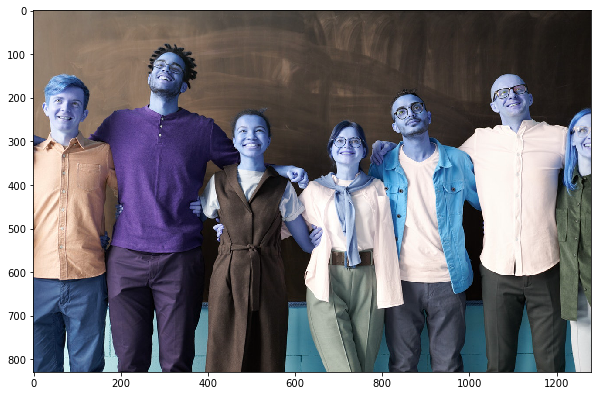

In [3]:
plt.imshow(img)
plt.show()

What if we visualize it in RGB?

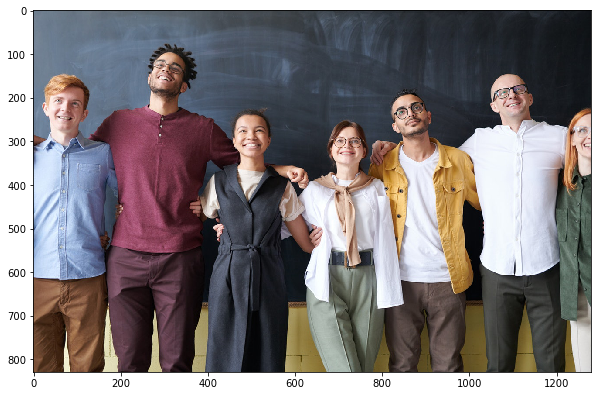

In [4]:
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgrgb)
plt.show()

The working folder contains pre-trained classifiers for face, eyes, smile and glasses in XML form:

In [5]:
!ls

haarcascade_eye_tree_eyeglasses.xml  haarcascade_smile.xml
haarcascade_eye.xml		     opencv_detect.ipynb
haarcascade_frontalface_default.xml  people-taking-group-picture.jpg


In [1]:
# cascades: https://github.com/opencv/opencv/tree/master/data/haarcascades
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')
glasses_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye_tree_eyeglasses.xml')
smile_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_smile.xml')

NameError: name 'cv2' is not defined

Let's start with the Haar-cascade detection. There are two parameters I will be fiddling in order for the different facial features to be recognized:

- scaleFactor: Parameter specifying how much the image size is reduced at each image scale. Increasing it leads to faster detection with the risk of missing some objects, whereas a small value might sometimes be too thorough.
- minNeighbors: Parameter specifying how many neighbors each candidate rectangle should have to retain it. Higher value results in less detections but with higher quality.

Note also that classification happens in grayscale mode.

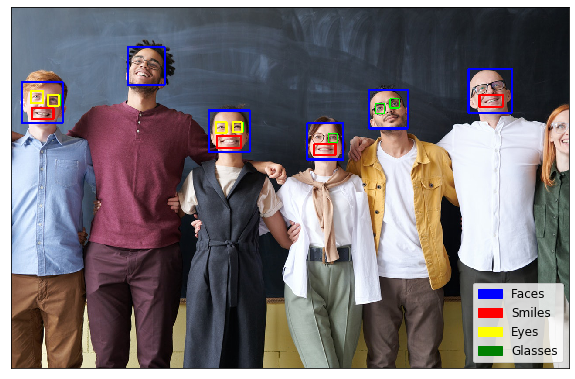

In [7]:
img = cv2.imread('people-taking-group-picture.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# default MultiScale paramters: scaleFactor=1.1, minNeighbors=3
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for(x, y, w, h) in faces:
    img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 3)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    smiles = smile_cascade.detectMultiScale(roi_gray, minNeighbors=20)
    for(sx, sy, sw, sh) in smiles:
        cv2.rectangle(roi_color, (sx,sy), (sx+sw,sy+sh), (0,0,255), 3)
    
    glasses = glasses_cascade.detectMultiScale(roi_gray, scaleFactor=1.04, minNeighbors=1)
    for(gx, gy, gw, gh) in glasses:
        cv2.rectangle(roi_color, (gx,gy), (gx+gw,gy+gh), (0,255,0), 2)
        
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,255), 3)
    
plt.xticks([])
plt.yticks([])

face_patch = mpatches.Patch(color='blue', label='Faces')
smile_patch = mpatches.Patch(color='red', label='Smiles')
eye_patch = mpatches.Patch(color='yellow', label='Eyes')
glass_patch = mpatches.Patch(color='green', label='Glasses')
plt.legend(handles=[face_patch, smile_patch, eye_patch, glass_patch], 
           loc='lower right', fontsize=12)

imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

The glasses were the most difficult to get working, might have to do with the fact that the people are looking upwards a bit. We can also so see that the face classifier have not been trained to recognize only half a face.

Next, let's try out something more fun in the form of video recognition. This requires a webcam, press the esc button when you want to exit the camera window.

In [8]:
cap = cv2.VideoCapture(0)

while True:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for(x, y, w, h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)
        for(ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0), 2)
        
        smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.8, minNeighbors=20)
        for(sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx,sy), (sx+sw,sy+sh), (0,0,255), 2)

    cv2.imshow('img', img)
    
    k = cv2.waitKey(30)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()